# 01 准确度的陷阱和混淆矩阵

## 分类准确度问题
一个癌症预测系统，输入体检信息，可以判断是否有癌症，如果一个系统的预测准确度是99.9%，而癌症的概率只有0.01%，那预测所有人都是健康的，可以达到99.99%的准确率，即这个预测系统是失败的

如此产生的原因是：对于极度偏斜(Skewed Data)的数据，只使用分类准确度是远远不够的

使用混淆矩阵做进一步的分析

## 混淆矩阵 (Confusion matrix)
对于二分类问题
- 预测
    - 0-Ngeative
    - 1-Positive
- 真实
    - 0-False
    - 1-True

xx:预测结果预测值


|真实值\\预测值|0|1|
|:----:|:----:|:----:|
|0|TN|FP|
|1|FN|TP|


# 02 精准率和召回率

在癌症预测系统中对于10000个病人进行分类，混淆矩阵如下：

|真实值\\预测值|0|1|
|:----:|:----:|:----:|
|0|9978|12|
|1|2|8|

精准率(预测为1的正确数在预测为1中的占比):$precision = \frac{TP}{TP+FP}$

精准率 = 8/(8+12) = 40%

召回率(预测为1的正确数在真实为1中的占比):$recall = \frac{TP}{TP+FN}$

召回率 = 8/(8+2) = 80%

# 03 代码实现

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造偏斜数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear') # 可以消除warining
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9755555555555555

In [5]:
y_log_predict = log_reg.predict(X_test)

In [6]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
TN(y_test,y_log_predict)

403

In [7]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test,y_log_predict)

2

In [8]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test,y_log_prodict)

9

In [9]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test,y_log_predict)

36

In [10]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [11]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
precision_score(y_test, y_log_predict)

0.9473684210526315

In [12]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.8

###  在sklearn 中

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

# 04 F1 Score

F1，是精准率和召回率的调和平均数，兼顾精准率和召回率

$$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
def f1_score(precision, recall):
    try:
        return 2 * (precision * recall) / (precision + recall)
    except:
        return 0.0

In [3]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造偏斜数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear') # 可以消除warining
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9755555555555555

In [7]:
y_predict = log_reg.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

# 05 Precision-Recall (精准率和召回率 ) 的平衡



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造偏斜数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear') # 可以消除warining
log_reg.fit(X_train,y_train)
y_predict = log_reg.predict(X_test)

In [7]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [9]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [10]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [12]:
scores = log_reg.decision_function(X_test)
scores

array([-22.05699728, -33.02941489, -16.21335088, -80.37916297,
       -48.25125309, -24.54006521, -44.39168581, -25.0429477 ,
        -0.97828839, -19.71745384, -66.25139278, -51.09603001,
       -31.49349159, -46.05334697, -38.67877272, -29.80472044,
       -37.58850411, -82.57570297, -37.81904378, -11.01165598,
        -9.17440282, -85.13004858, -16.71616451, -46.2372651 ,
        -5.32994343, -47.91762424, -11.66730613, -39.19606675,
       -25.25294596, -14.36647263, -16.99784322, -28.91906343,
       -34.33942078, -29.47608376,  -7.85813331,  -3.82093432,
       -24.08165466, -22.16362793, -33.61221199, -23.14024239,
       -26.91805368, -62.38938376, -38.85691793, -66.7726097 ,
       -20.14483425, -17.47887025, -18.06800222, -22.22226081,
       -29.62304646, -19.73171496,   1.49551643,   8.32080732,
       -36.2931167 , -42.50733657, -25.90459635, -34.98961158,
        -8.42012522, -50.04726791, -51.48209177,  19.88959953,
        -8.91888592, -31.99344717, -11.66100579,  -0.47

In [13]:
scores[:10]

array([-22.05699728, -33.02941489, -16.21335088, -80.37916297,
       -48.25125309, -24.54006521, -44.39168581, -25.0429477 ,
        -0.97828839, -19.71745384])

In [14]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
decision_scores = log_reg.decision_function(X_test)

In [19]:
np.min(decision_scores),np.max(decision_scores)

(-85.68609464141575, 19.889599525838047)

In [20]:
y_predict_5 = np.array(decision_scores >=5, dtype='int')

In [21]:
confusion_matrix(y_test, y_predict_5)

array([[404,   1],
       [ 21,  24]])

In [22]:
precision_score(y_test, y_predict_5)

0.96

In [23]:
recall_score(y_test, y_predict_5)

0.5333333333333333

In [24]:
y_predict__5 = np.array(decision_scores >=-5, dtype='int')

In [25]:
confusion_matrix(y_test, y_predict__5)

array([[390,  15],
       [  5,  40]])

In [26]:
precision_score(y_test, y_predict__5), recall_score(y_test, y_predict__5)

(0.7272727272727273, 0.8888888888888888)

# 06 精准率—召回率曲线 PR曲线

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

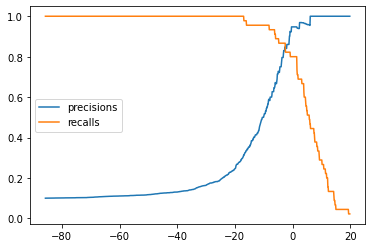

In [37]:
plt.plot(thresholds, precisions, label='precisions')
plt.plot(thresholds, recalls, label='recalls')
plt.legend()
plt.show()

## PR曲线

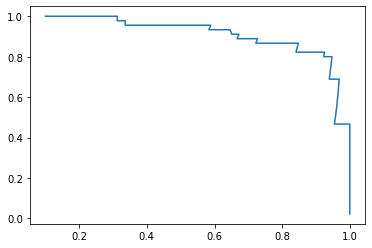

In [38]:
plt.plot(precisions,recalls)
plt.show()

## sklearn中的PR曲线

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test,decision_scores)

In [41]:
precisions.shape, recalls.shape, thresholds.shape

((145,), (145,), (144,))

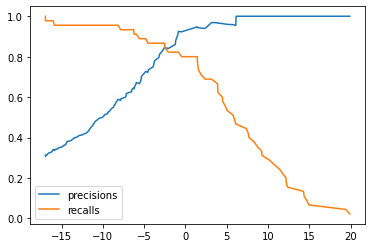

In [42]:
plt.plot(thresholds, precisions[:-1], label='precisions')
plt.plot(thresholds, recalls[:-1], label='recalls')
plt.legend()
plt.show()

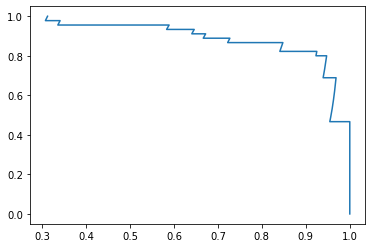

In [43]:
plt.plot(precisions,recalls)
plt.show()

# 07 ROC曲线
Receiver Opeartion Characteristic Curve

描述TPR和FPR之间的关系

|真实\预测|0|1|
|:----:|:----:|:----:|
|0|9978-TN|12-FP|
|1|2-FN|8-TP|

$$FPR=\frac{FP}{TN+FP}$$
$$TPR=\frac{TP}{TP+FN}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
from playML.metrics import FPR,TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

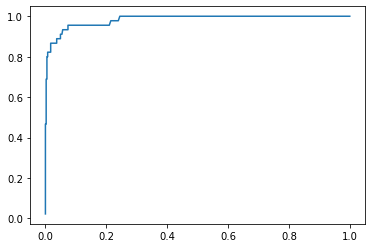

In [6]:
plt.plot(fprs,tprs)
plt.show()

In [8]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

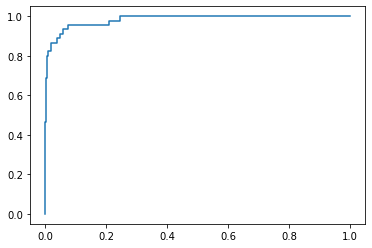

In [9]:
plt.plot(fprs, tprs)
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9830452674897119

# 08 多分类问题中的混淆矩阵

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484

多分类问题，不能直接求取准确值

In [10]:
y_predict = log_reg.predict(X_test)

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average="micro")

0.93115438108484

In [12]:
from  sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

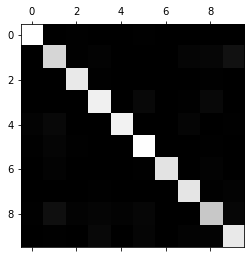

In [13]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)#映射为灰度图
plt.show()

In [15]:
row_sum = np.sum(cfm, axis=1)
err_matrix = cfm / row_sum
np.fill_diagonal(err_matrix, 0)
err_matrix


array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

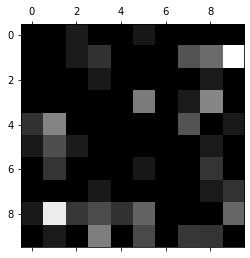

In [16]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()